## Add amp scan

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_directory = "."

with open(f"{data_directory}/amp_scan.pickle", "rb") as file:
    data = pickle.load(file)

/var/folders/2g/rllyjykx4jb1xv166_kxl_2h0000gn/T/ipykernel_28623/3720755080.py:4: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


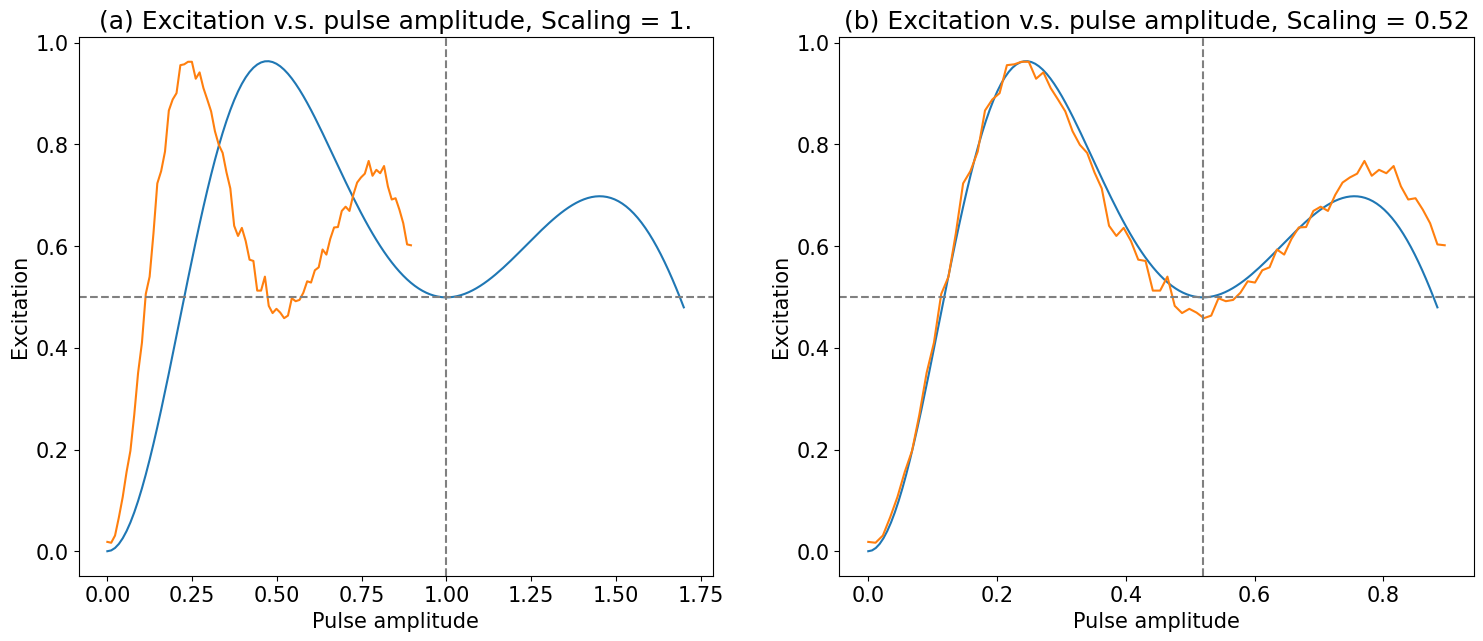

In [4]:
import matplotlib

font = {'size'   : 15}

matplotlib.rc('font', **font)

amp_list = data["sim_amp_list"]
sim_populations = data["sim_populations"]
exp_amp_list = data["exp_amp_list"]
exp_populations = data["exp_populations"]

fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    #sharex="col", sharey="row",
    figsize=(18, 7)
)

axes[0].plot(amp_list, np.array(sim_populations), label="Simulation")
axes[0].plot(exp_amp_list, exp_populations, label="Experiment")
axes[0].axvline(1.,color='gray',linestyle='dashed')
axes[0].axhline(0.5,color='gray',linestyle='dashed')
axes[0].set_title("(a) Excitation v.s. pulse amplitude, Scaling = 1.")
axes[0].set_xlabel("Pulse amplitude")
axes[0].set_ylabel("Excitation")
#axes[0].legend()

axes[1].plot(0.52 * amp_list, np.array(sim_populations), label="Simulation")
axes[1].plot(exp_amp_list, exp_populations, label="Experiment")
#plt.axvline(amp_opt,color='gray',linestyle='dashed')
axes[1].axvline(0.52,color='gray',linestyle='dashed')
axes[1].axhline(0.5,color='gray',linestyle='dashed')
axes[1].set_title("(b) Excitation v.s. pulse amplitude, Scaling = 0.52")
axes[1].set_xlabel("Pulse amplitude")
axes[1].set_ylabel("Excitation")
#axes[1].legend()
plt.savefig('amp_scan_precal.svg')

# RB Data post-amp

In [5]:

def ffunc(x, initial, final, alpha):
    """Randomized benchmarking exponential"""
    exp_scale = 1
    return final + (initial - final) * alpha**(exp_scale*x)

In [6]:
# load data 
with open(f"{data_directory}/rb_data_post_amp.pickle", "rb") as data_file:
    data_dict = pickle.load(data_file)

plot

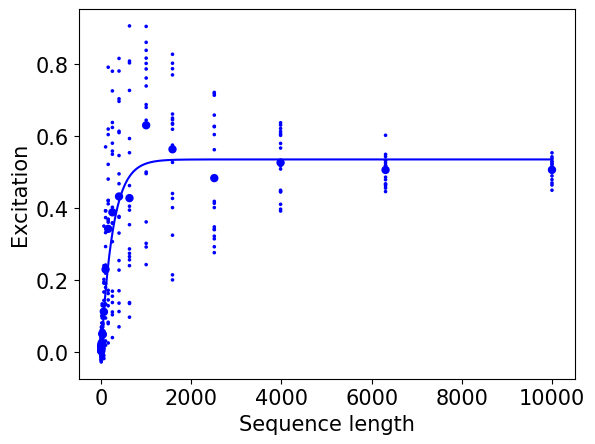

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    #sharex="col", sharey="row",
    #figsize=(5, 10)
)


axes.scatter(
    data_dict["rbdat_clifford_numbers"],
    data_dict["rbdat_calibrated_signal"],
    s = np.ones(len(data_dict["rbdat_calibrated_signal"]))*2.5,
    c = 'b'
)
axes.scatter(
    data_dict["rbdat_number_means"],
    data_dict["rbdat_signal_means"],
    s = np.ones(len(data_dict["rbdat_signal_means"]))*25,
    c = 'b'
)
axes.plot(
    np.linspace(0,10000,10000),
    ffunc(
        np.linspace(0,10000,10000),
        data_dict["popt"][0], data_dict["popt"][1], data_dict["popt"][2]
    ),
    c = 'b',
    label="Exponential fit"
)
axes.set_ylabel("Excitation")
axes.set_xlabel("Sequence length")
#axes.legend()
plt.savefig('rb_precal.svg')


In [7]:
data_dict['epc']

np.float64(0.0019263344373004476)

# amplification sequence data

In [8]:
N_vals = np.arange(0, 40)
phases = np.linspace(0, np.pi, 7)
shots=400

phase_results = [np.array([ 0.025,  0.15 ,  0.29 ,  0.25 ,  0.435,  0.495,  0.6  ,  0.64 ,
         0.775,  0.775,  0.83 ,  0.865,  0.885,  0.92 ,  0.93 ,  0.955,
         0.905,  0.945,  0.905,  0.875,  0.785,  0.745,  0.675,  0.6  ,
         0.53 ,  0.4  ,  0.37 ,  0.265,  0.235,  0.065, -0.07 , -0.195,
        -0.125, -0.23 , -0.335, -0.48 , -0.525, -0.675, -0.63 , -0.69 ]),
 np.array([ 0.035,  0.125,  0.36 ,  0.305,  0.445,  0.52 ,  0.67 ,  0.73 ,
         0.835,  0.845,  0.9  ,  0.87 ,  0.925,  0.885,  0.92 ,  0.82 ,
         0.81 ,  0.73 ,  0.625,  0.53 ,  0.465,  0.365,  0.265,  0.095,
        -0.035, -0.15 , -0.135, -0.32 , -0.48 , -0.58 , -0.58 , -0.745,
        -0.78 , -0.82 , -0.785, -0.925, -0.88 , -0.905, -0.83 , -0.81 ]),
 np.array([ 0.115,  0.105,  0.275,  0.385,  0.49 ,  0.555,  0.595,  0.66 ,
         0.795,  0.71 ,  0.81 ,  0.775,  0.795,  0.745,  0.715,  0.585,
         0.565,  0.41 ,  0.395,  0.205,  0.18 , -0.04 , -0.06 , -0.265,
        -0.26 , -0.345, -0.48 , -0.585, -0.645, -0.745, -0.73 , -0.865,
        -0.785, -0.815, -0.74 , -0.7  , -0.635, -0.58 , -0.535, -0.46 ]),
 np.array([ 0.145,  0.125,  0.11 ,  0.375,  0.415,  0.475,  0.61 ,  0.605,
         0.64 ,  0.665,  0.61 ,  0.635,  0.605,  0.545,  0.405,  0.38 ,
         0.365,  0.265,  0.205,  0.18 , -0.115, -0.04 , -0.185, -0.34 ,
        -0.405, -0.51 , -0.47 , -0.575, -0.56 , -0.525, -0.565, -0.595,
        -0.565, -0.53 , -0.535, -0.455, -0.375, -0.29 , -0.145, -0.175]),
 np.array([ 0.12 ,  0.135,  0.225,  0.325,  0.265,  0.395,  0.385,  0.44 ,
         0.425,  0.52 ,  0.335,  0.43 ,  0.4  ,  0.365,  0.32 ,  0.35 ,
         0.27 ,  0.24 ,  0.125,  0.045, -0.04 , -0.06 , -0.12 , -0.12 ,
        -0.325, -0.295, -0.33 , -0.275, -0.425, -0.445, -0.42 , -0.4  ,
        -0.4  , -0.395, -0.28 , -0.265, -0.265, -0.23 , -0.19 , -0.135]),
 np.array([ 0.005,  0.18 ,  0.115,  0.26 ,  0.115,  0.195,  0.12 ,  0.275,
         0.255,  0.135,  0.135,  0.325,  0.135,  0.225,  0.09 ,  0.19 ,
         0.065,  0.145, -0.055,  0.08 , -0.065, -0.03 , -0.095, -0.06 ,
        -0.245, -0.15 , -0.18 , -0.09 , -0.255, -0.16 , -0.19 , -0.185,
        -0.225, -0.24 , -0.065, -0.14 , -0.225, -0.125, -0.135, -0.025]),
 np.array([ 0.065,  0.085, -0.02 ,  0.17 ,  0.04 ,  0.095, -0.045,  0.065,
        -0.055,  0.02 , -0.155,  0.075, -0.15 , -0.025, -0.12 , -0.02 ,
        -0.08 , -0.04 , -0.21 , -0.045, -0.09 , -0.11 , -0.135, -0.15 ,
        -0.185, -0.125, -0.185, -0.04 , -0.165, -0.13 , -0.105, -0.03 ,
        -0.105,  0.02 , -0.07 , -0.015, -0.105,  0.035, -0.02 ,  0.155])]

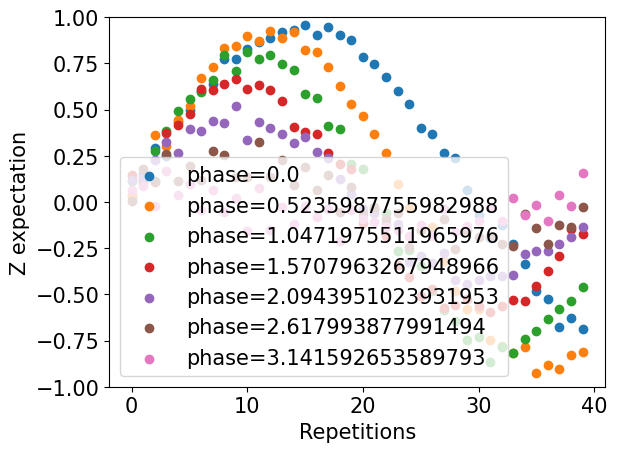

In [9]:
for phase_result in phase_results:
    plt.scatter(N_vals, phase_result)

plt.legend(labels=[f"phase={p}" for p in phases])
plt.xlabel("Repetitions")
plt.ylabel("Z expectation")
plt.ylim(-1, 1)
plt.show()

# after amplification calibration

This can just be replaced by whatever full data is acquired.

In [10]:
# load data 
with open(f"{data_directory}/rb_after_full_cal.pickle", "rb") as data_file:
    data_dict = pickle.load(data_file)

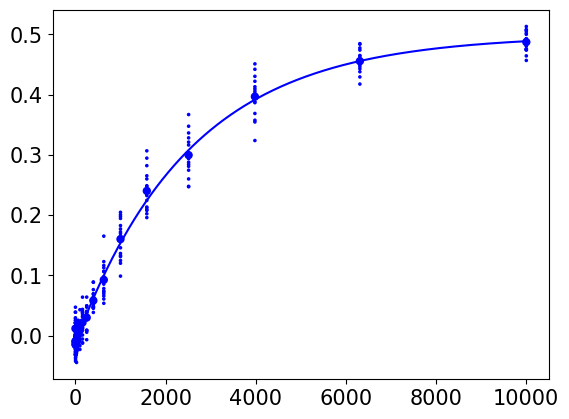

In [12]:
import matplotlib.pyplot as plt

plt.scatter(
    data_dict["rbdat_clifford_numbers"],
    data_dict["rbdat_calibrated_signal"],
    s = np.ones(len(data_dict["rbdat_calibrated_signal"]))*2.5,
    c = 'b'
)
plt.scatter(
    data_dict["rbdat_number_means"],
    data_dict["rbdat_signal_means"],
    s = np.ones(len(data_dict["rbdat_signal_means"]))*25,
    c = 'b'
)
plt.plot(
    np.linspace(0,10000,10000),
    ffunc(
        np.linspace(0,10000,10000),
        data_dict["popt"][0], data_dict["popt"][1], data_dict["popt"][2]
    ),
    c = 'b'
)
plt.savefig('rb_postcal.svg')
plt.show()


In [14]:
data_dict["epc"]

np.float64(0.00019602706821103544)

## Amp sequences post calibration

In [13]:
phase_results_post_cal = [np.array([-0.015,  0.09 ,  0.005,  0.055, -0.09 ,  0.015, -0.04 ,  0.005,
        -0.07 ,  0.005, -0.07 , -0.01 , -0.07 , -0.01 , -0.135, -0.045,
        -0.04 , -0.12 , -0.105, -0.1  , -0.12 , -0.07 , -0.065, -0.075,
         0.015, -0.065, -0.075, -0.06 , -0.095, -0.095, -0.105, -0.06 ,
        -0.13 , -0.185, -0.1  , -0.045, -0.095, -0.135, -0.165, -0.075]),
 np.array([ 0.   , -0.01 , -0.05 , -0.005,  0.03 , -0.015, -0.025,  0.05 ,
        -0.06 ,  0.045,  0.015, -0.03 , -0.04 , -0.02 , -0.04 , -0.08 ,
         0.   , -0.01 , -0.05 , -0.025, -0.025,  0.015,  0.07 , -0.055,
        -0.005, -0.02 , -0.035, -0.075,  0.015, -0.145, -0.05 , -0.015,
        -0.02 ,  0.01 , -0.095,  0.025, -0.095, -0.145, -0.045, -0.035]),
 np.array([-0.06 , -0.08 , -0.005, -0.06 , -0.045, -0.03 ,  0.005, -0.035,
         0.03 , -0.05 ,  0.015, -0.015,  0.035,  0.06 ,  0.055,  0.035,
         0.015,  0.025,  0.1  , -0.01 ,  0.055,  0.05 ,  0.055, -0.005,
        -0.04 , -0.055,  0.05 , -0.02 , -0.045,  0.015,  0.025,  0.065,
         0.01 ,  0.07 ,  0.05 ,  0.04 , -0.06 ,  0.19 ,  0.005,  0.035]),
 np.array([ 0.02 ,  0.05 ,  0.07 , -0.02 , -0.025, -0.   , -0.04 ,  0.06 ,
         0.105,  0.01 , -0.085,  0.04 ,  0.   ,  0.005, -0.04 ,  0.07 ,
         0.015,  0.025,  0.045,  0.08 ,  0.085,  0.05 , -0.01 ,  0.015,
         0.12 , -0.01 ,  0.07 ,  0.06 ,  0.015,  0.085,  0.1  ,  0.02 ,
         0.03 ,  0.165,  0.025,  0.11 ,  0.09 ,  0.14 ,  0.205,  0.075]),
 np.array([-0.06 ,  0.06 ,  0.065,  0.015, -0.055, -0.045, -0.02 , -0.01 ,
        -0.04 ,  0.02 ,  0.04 , -0.015,  0.05 ,  0.11 ,  0.09 ,  0.085,
         0.04 ,  0.055,  0.115,  0.04 ,  0.165,  0.105, -0.02 ,  0.085,
         0.055,  0.125,  0.155,  0.07 ,  0.145,  0.085,  0.06 ,  0.055,
         0.065,  0.055,  0.085,  0.12 ,  0.16 ,  0.11 ,  0.05 ,  0.105]),
 np.array([-0.035,  0.035, -0.03 , -0.03 , -0.015,  0.1  ,  0.065,  0.11 ,
         0.   ,  0.01 ,  0.08 , -0.02 , -0.045, -0.015, -0.06 ,  0.025,
        -0.025,  0.105, -0.02 ,  0.03 , -0.005,  0.13 , -0.015,  0.105,
         0.005,  0.125,  0.005,  0.045, -0.01 , -0.005,  0.025,  0.07 ,
         0.045,  0.03 ,  0.06 ,  0.13 ,  0.085,  0.12 ,  0.1  ,  0.09 ]),
 np.array([ 0.02 , -0.02 ,  0.02 , -0.05 ,  0.045,  0.01 , -0.05 , -0.09 ,
         0.03 ,  0.05 , -0.055, -0.085,  0.025,  0.06 ,  0.04 ,  0.03 ,
         0.015, -0.035,  0.005, -0.04 ,  0.035,  0.03 ,  0.055, -0.005,
         0.06 ,  0.035, -0.04 , -0.01 , -0.095,  0.005,  0.005, -0.05 ,
         0.05 ,  0.065,  0.015, -0.   , -0.005,  0.02 , -0.115,  0.01 ])]

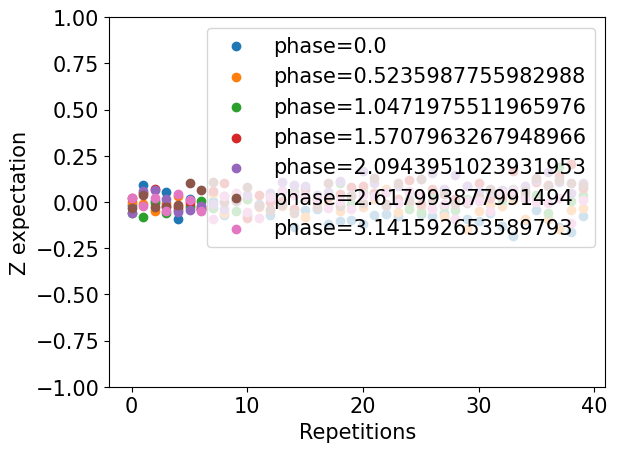

In [14]:
for phase_result in phase_results_post_cal:
    plt.scatter(N_vals, phase_result)

plt.legend(labels=[f"phase={p}" for p in phases])
plt.xlabel("Repetitions")
plt.ylabel("Z expectation")
plt.ylim(-1, 1)
plt.show()

# amp scan after cal

In [15]:
with open(f"{data_directory}/amp_scan.pickle", "rb") as file:
    data = pickle.load(file)

/var/folders/2g/rllyjykx4jb1xv166_kxl_2h0000gn/T/ipykernel_28623/1738916381.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


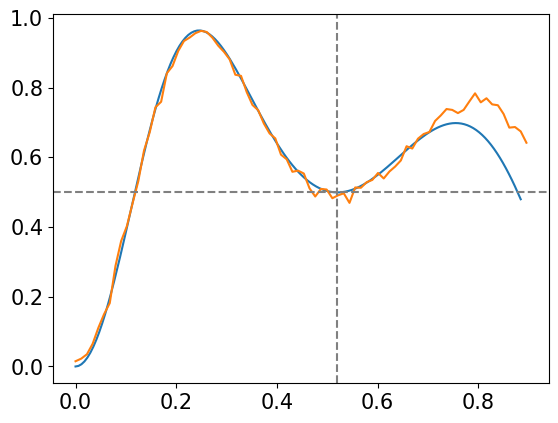

In [17]:
amp_list = data["sim_amp_list"]
sim_populations = data["sim_populations"]
exp_amp_list = data["exp_amp_list"]
exp_populations = np.array([0.015     , 0.0225    , 0.035     , 0.065     , 0.11083333,
       0.15      , 0.18166667, 0.28833333, 0.36      , 0.4025    ,
       0.46833333, 0.53166667, 0.61916667, 0.67166667, 0.74333333,
       0.75916667, 0.84083333, 0.86166667, 0.905     , 0.93333333,
       0.94333333, 0.95583333, 0.9625    , 0.95916667, 0.9425    ,
       0.92      , 0.9025    , 0.88083333, 0.83666667, 0.83333333,
       0.78666667, 0.75      , 0.735     , 0.69666667, 0.66833333,
       0.65416667, 0.6075    , 0.59416667, 0.55833333, 0.56166667,
       0.55333333, 0.51083333, 0.4875    , 0.50916667, 0.5075    ,
       0.4825    , 0.49083333, 0.49666667, 0.46916667, 0.51333333,
       0.5125    , 0.52833333, 0.535     , 0.555     , 0.53916667,
       0.55916667, 0.57333333, 0.59083333, 0.63166667, 0.625     ,
       0.65333333, 0.66666667, 0.6725    , 0.70416667, 0.72      ,
       0.73833333, 0.73583333, 0.72666667, 0.73583333, 0.76      ,
       0.78333333, 0.7575    , 0.76916667, 0.75166667, 0.74916667,
       0.72416667, 0.685     , 0.68666667, 0.67416667, 0.64166667])

amp_opt = 0.52

plt.plot(amp_opt * amp_list, np.array(sim_populations))
plt.plot(exp_amp_list, exp_populations)
plt.axvline(amp_opt,color='gray',linestyle='dashed')
plt.axhline(0.5,color='gray',linestyle='dashed')

plt.savefig('amp_scan_postcal.svg')

## Combined amp and RB plot

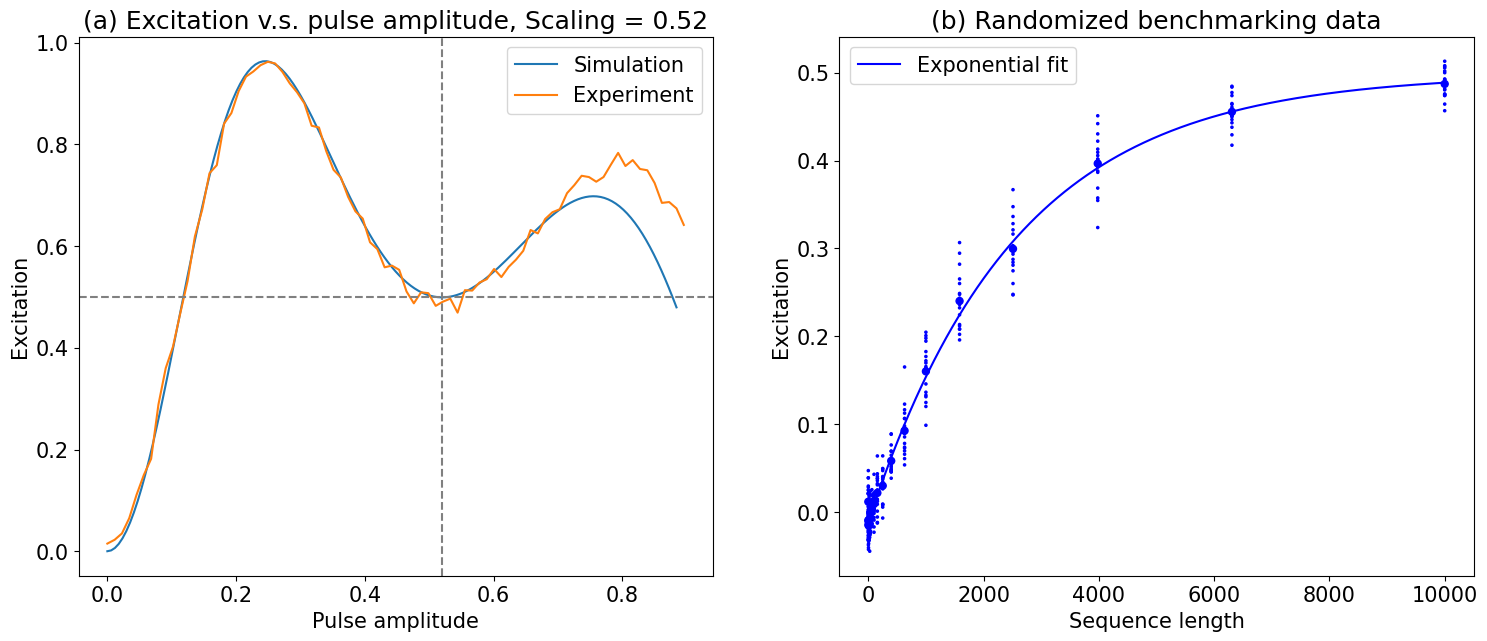

In [19]:
import matplotlib

font = {'size'   : 15}

matplotlib.rc('font', **font)

fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    #sharex="col", sharey="row",
    figsize=(18, 7)
)

axes[0].plot(0.52 * amp_list, np.array(sim_populations), label="Simulation")
axes[0].plot(exp_amp_list, exp_populations, label="Experiment")
axes[0].axvline(0.52,color='gray',linestyle='dashed')
axes[0].axhline(0.5,color='gray',linestyle='dashed')
axes[0].set_title("(a) Excitation v.s. pulse amplitude, Scaling = 0.52")
axes[0].set_xlabel("Pulse amplitude")
axes[0].set_ylabel("Excitation")
axes[0].legend()

axes[1].scatter(
    data_dict["rbdat_clifford_numbers"],
    data_dict["rbdat_calibrated_signal"],
    s = np.ones(len(data_dict["rbdat_calibrated_signal"]))*2.5,
    c = 'b'
)
axes[1].scatter(
    data_dict["rbdat_number_means"],
    data_dict["rbdat_signal_means"],
    s = np.ones(len(data_dict["rbdat_signal_means"]))*25,
    c = 'b'
)
axes[1].plot(
    np.linspace(0,10000,10000),
    ffunc(
        np.linspace(0,10000,10000),
        data_dict["popt"][0], data_dict["popt"][1], data_dict["popt"][2]
    ),
    c = 'b',
    label="Exponential fit"
)
axes[1].set_title("(b) Randomized benchmarking data")
axes[1].set_ylabel("Excitation")
axes[1].set_xlabel("Sequence length")
axes[1].legend()

## Drag after cal

In [20]:
# load data 
with open(f"{data_directory}/drag_long_rb.pickle", "rb") as data_file:
    data_dict = pickle.load(data_file)

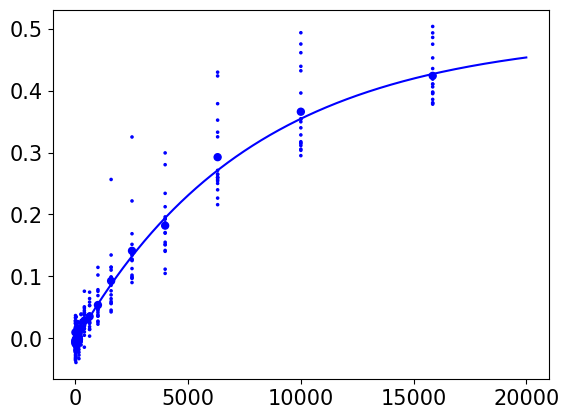

In [21]:
import matplotlib.pyplot as plt

plt.scatter(
    data_dict["rbdat_clifford_numbers"],
    data_dict["rbdat_calibrated_signal"],
    s = np.ones(len(data_dict["rbdat_calibrated_signal"]))*2.5,
    c = 'b'
)
plt.scatter(
    data_dict["rbdat_number_means"],
    data_dict["rbdat_signal_means"],
    s = np.ones(len(data_dict["rbdat_signal_means"]))*25,
    c = 'b'
)
plt.plot(
    np.linspace(0,20000,20000),
    ffunc(
        np.linspace(0,20000,20000),
        data_dict["popt"][0], data_dict["popt"][1], data_dict["popt"][2]
    ),
    c = 'b'
)
plt.show()


In [22]:
data_dict["epc"]

np.float64(6.44476746587963e-05)

## RB scan data

In [23]:
with open(f"{data_directory}/oct_scan_data.pickle", "rb") as data_file:
    oct_data = pickle.load(data_file)

with open(f"{data_directory}/drag_scan_data.pickle", "rb") as data_file:
    drag_data = pickle.load(data_file)

In [24]:
ordered_amp_scales = np.array([0.9, 0.925, 0.95, 0.975, 1., 1.025, 1.05, 1.075, 1.1])
ordered_detunings = np.array([-1e6, -75e4, -50e4, -25e4, 0., 25e4, 50e4, 75e4, 1e6])

drag_epc_grid = np.empty((9, 9), dtype=float)
drag_epc_std_grid = np.empty((9, 9), dtype=float)
oct_epc_grid = np.empty((9, 9), dtype=float)
oct_epc_std_grid = np.empty((9, 9), dtype=float)

for data in oct_data:
    detuning_idx = np.argmin(np.abs(ordered_detunings - data["detuning"]))
    amp_scale_idx = np.argmin(np.abs(ordered_amp_scales - data["amp_scale"]))
    oct_epc_grid[amp_scale_idx, detuning_idx] = data["epc"]
    oct_epc_std_grid[amp_scale_idx, detuning_idx] = data["epc_std"]

for data in drag_data:
    detuning_idx = np.argmin(np.abs(ordered_detunings - data["detuning"]))
    amp_scale_idx = np.argmin(np.abs(ordered_amp_scales - data["amp_scale"]))
    drag_epc_grid[amp_scale_idx, detuning_idx] = data["epc"]
    drag_epc_std_grid[amp_scale_idx, detuning_idx] = data["epc_std"]

OCT epc at 1.: 0.00019660724200576407
DRAG epc at 1.: 0.00010163822262226896


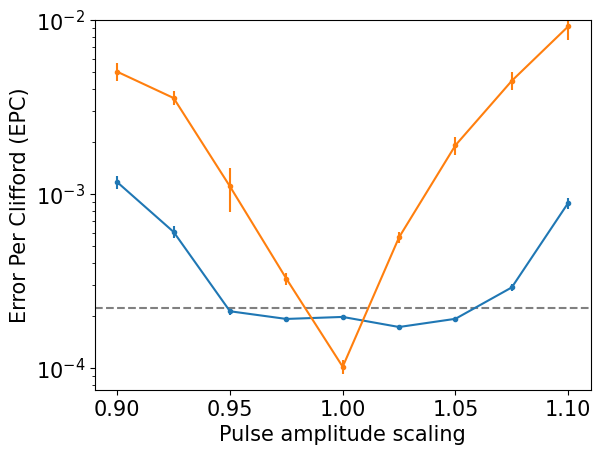

In [28]:
import matplotlib.pyplot as plt

col = 4

plt.yscale("log")
plt.errorbar(ordered_amp_scales, oct_epc_grid[:, col], yerr=oct_epc_std_grid[:, col], fmt=".-", label="optimized")
plt.errorbar(ordered_amp_scales, drag_epc_grid[:, col], yerr=drag_epc_std_grid[:, col], fmt=".-", label="drag")
plt.axhline(2.2e-4,color='gray',linestyle='dashed')
#plt.axhline(3e-4,color='gray',linestyle='dashed')
plt.ylim(7.5e-5, 1e-2)
plt.ylabel("Error Per Clifford (EPC)")
plt.xlabel("Pulse amplitude scaling")
#plt.legend()
plt.savefig('amp_scan.svg')

print(f"OCT epc at 1.: {oct_epc_grid[4, col]}")
print(f"DRAG epc at 1.: {drag_epc_grid[4, col]}")

OCT epc at 0.: 0.00019660724200576407
DRAG epc at 0.: 0.00010163822262226896


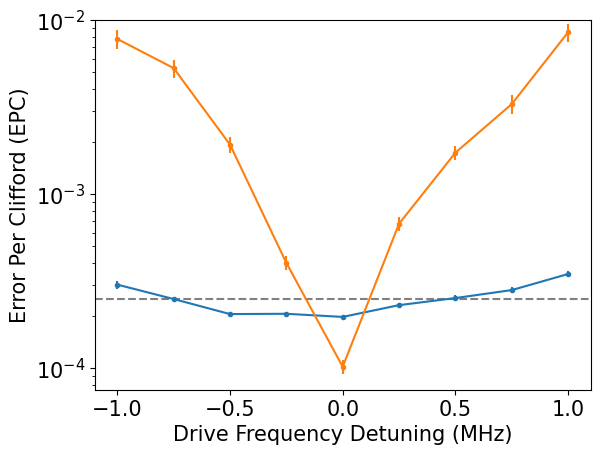

In [29]:
import matplotlib.pyplot as plt

row = 4

plt.yscale("log")
plt.errorbar(ordered_detunings/1e6, oct_epc_grid[row], yerr=oct_epc_std_grid[row], fmt=".-", label="optimized")
plt.errorbar(ordered_detunings/1e6, drag_epc_grid[row], yerr=drag_epc_std_grid[row], fmt=".-", label="drag")
plt.axhline(2.5e-4,color='gray',linestyle='dashed')
plt.ylim(7.5e-5, 1e-2)
#plt.axhline(3e-4,color='gray',linestyle='dashed')
plt.ylabel("Error Per Clifford (EPC)")
plt.xlabel("Drive Frequency Detuning (MHz)")
#plt.legend()
plt.savefig('freq_scan.svg')

print(f"OCT epc at 0.: {oct_epc_grid[row, 4]}")
print(f"DRAG epc at 0.: {drag_epc_grid[row, 4]}")

OCT epc at 0.: 0.00019660724200576407
DRAG epc at 0.: 0.00010163822262226896


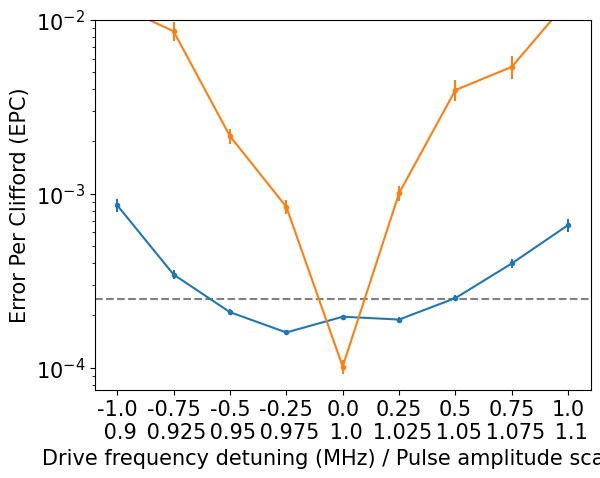

In [30]:
# diagonal plot

import matplotlib.pyplot as plt

oct_line = [oct_epc_grid[idx, idx] for idx in range(9)]
oct_std_line = [oct_epc_std_grid[idx, idx] for idx in range(9)]

drag_line = [drag_epc_grid[idx, idx] for idx in range(9)]
drag_std_line = [drag_epc_std_grid[idx, idx] for idx in range(9)]

ticks = [f"{a/1e6}\n {b}" for a, b in zip(ordered_detunings, ordered_amp_scales)]

plt.yscale("log")
plt.errorbar(ordered_detunings, oct_line, yerr=oct_std_line, fmt=".-", label="optimized")
plt.errorbar(ordered_detunings, drag_line, yerr=drag_std_line, fmt=".-", label="drag")
plt.axhline(2.5e-4,color='gray',linestyle='dashed')
#plt.axhline(3e-4,color='gray',linestyle='dashed')
plt.xticks(ordered_detunings, ticks)
plt.ylim(7.5e-5, 1e-2)
plt.ylabel("Error Per Clifford (EPC)")
plt.xlabel("Drive frequency detuning (MHz) / Pulse amplitude scaling")
#plt.legend()
plt.savefig('diag_scan.svg')

print(f"OCT epc at 0.: {oct_epc_grid[row, 4]}")
print(f"DRAG epc at 0.: {drag_epc_grid[row, 4]}")

## 2d plot

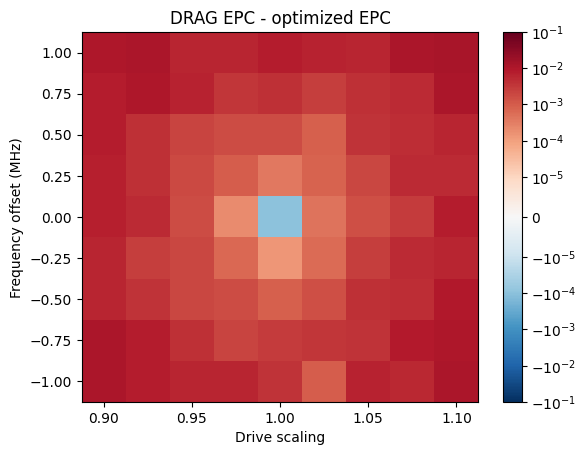

In [30]:
import matplotlib
import matplotlib.colors as colors

freq_offset_vals = np.linspace(-1e6, 1e6, 9)
scale_vals = np.linspace(0.9, 1.1, 9)


# helper function for 2D meshplots
def cell_centered(arr_in):
    arr_out = np.empty(len(arr_in)+1)
    dist = arr_in[1] - arr_in[0]
    for i in range(len(arr_in)):
        arr_out[i] = arr_in[i] - dist/2
    arr_out[-1] = arr_in[-1] + dist/2
    return arr_out

freq_corners = cell_centered(freq_offset_vals)
scale_corners = cell_centered(scale_vals)

cb_min = -1e-1
cb_max = -cb_min

diff = drag_epc_grid - oct_epc_grid
# set missing data point
#diff[1, -2] = np.nan

fig, ax1 = plt.subplots(1, 1)

cmap = matplotlib.cm.RdBu_r
cmap.set_bad('black', 1.)

im = ax1.pcolormesh(
    scale_corners, 
    freq_corners / 1e6,
    diff,
    norm=colors.SymLogNorm(linthresh=1e-5, vmin=cb_min, vmax=cb_max),
    cmap=cmap
)
ax1.set_title("DRAG EPC - optimized EPC")
ax1.set_xlabel("Drive scaling")
ax1.set_ylabel("Frequency offset (MHz)")
plt.colorbar(im)
plt.show()

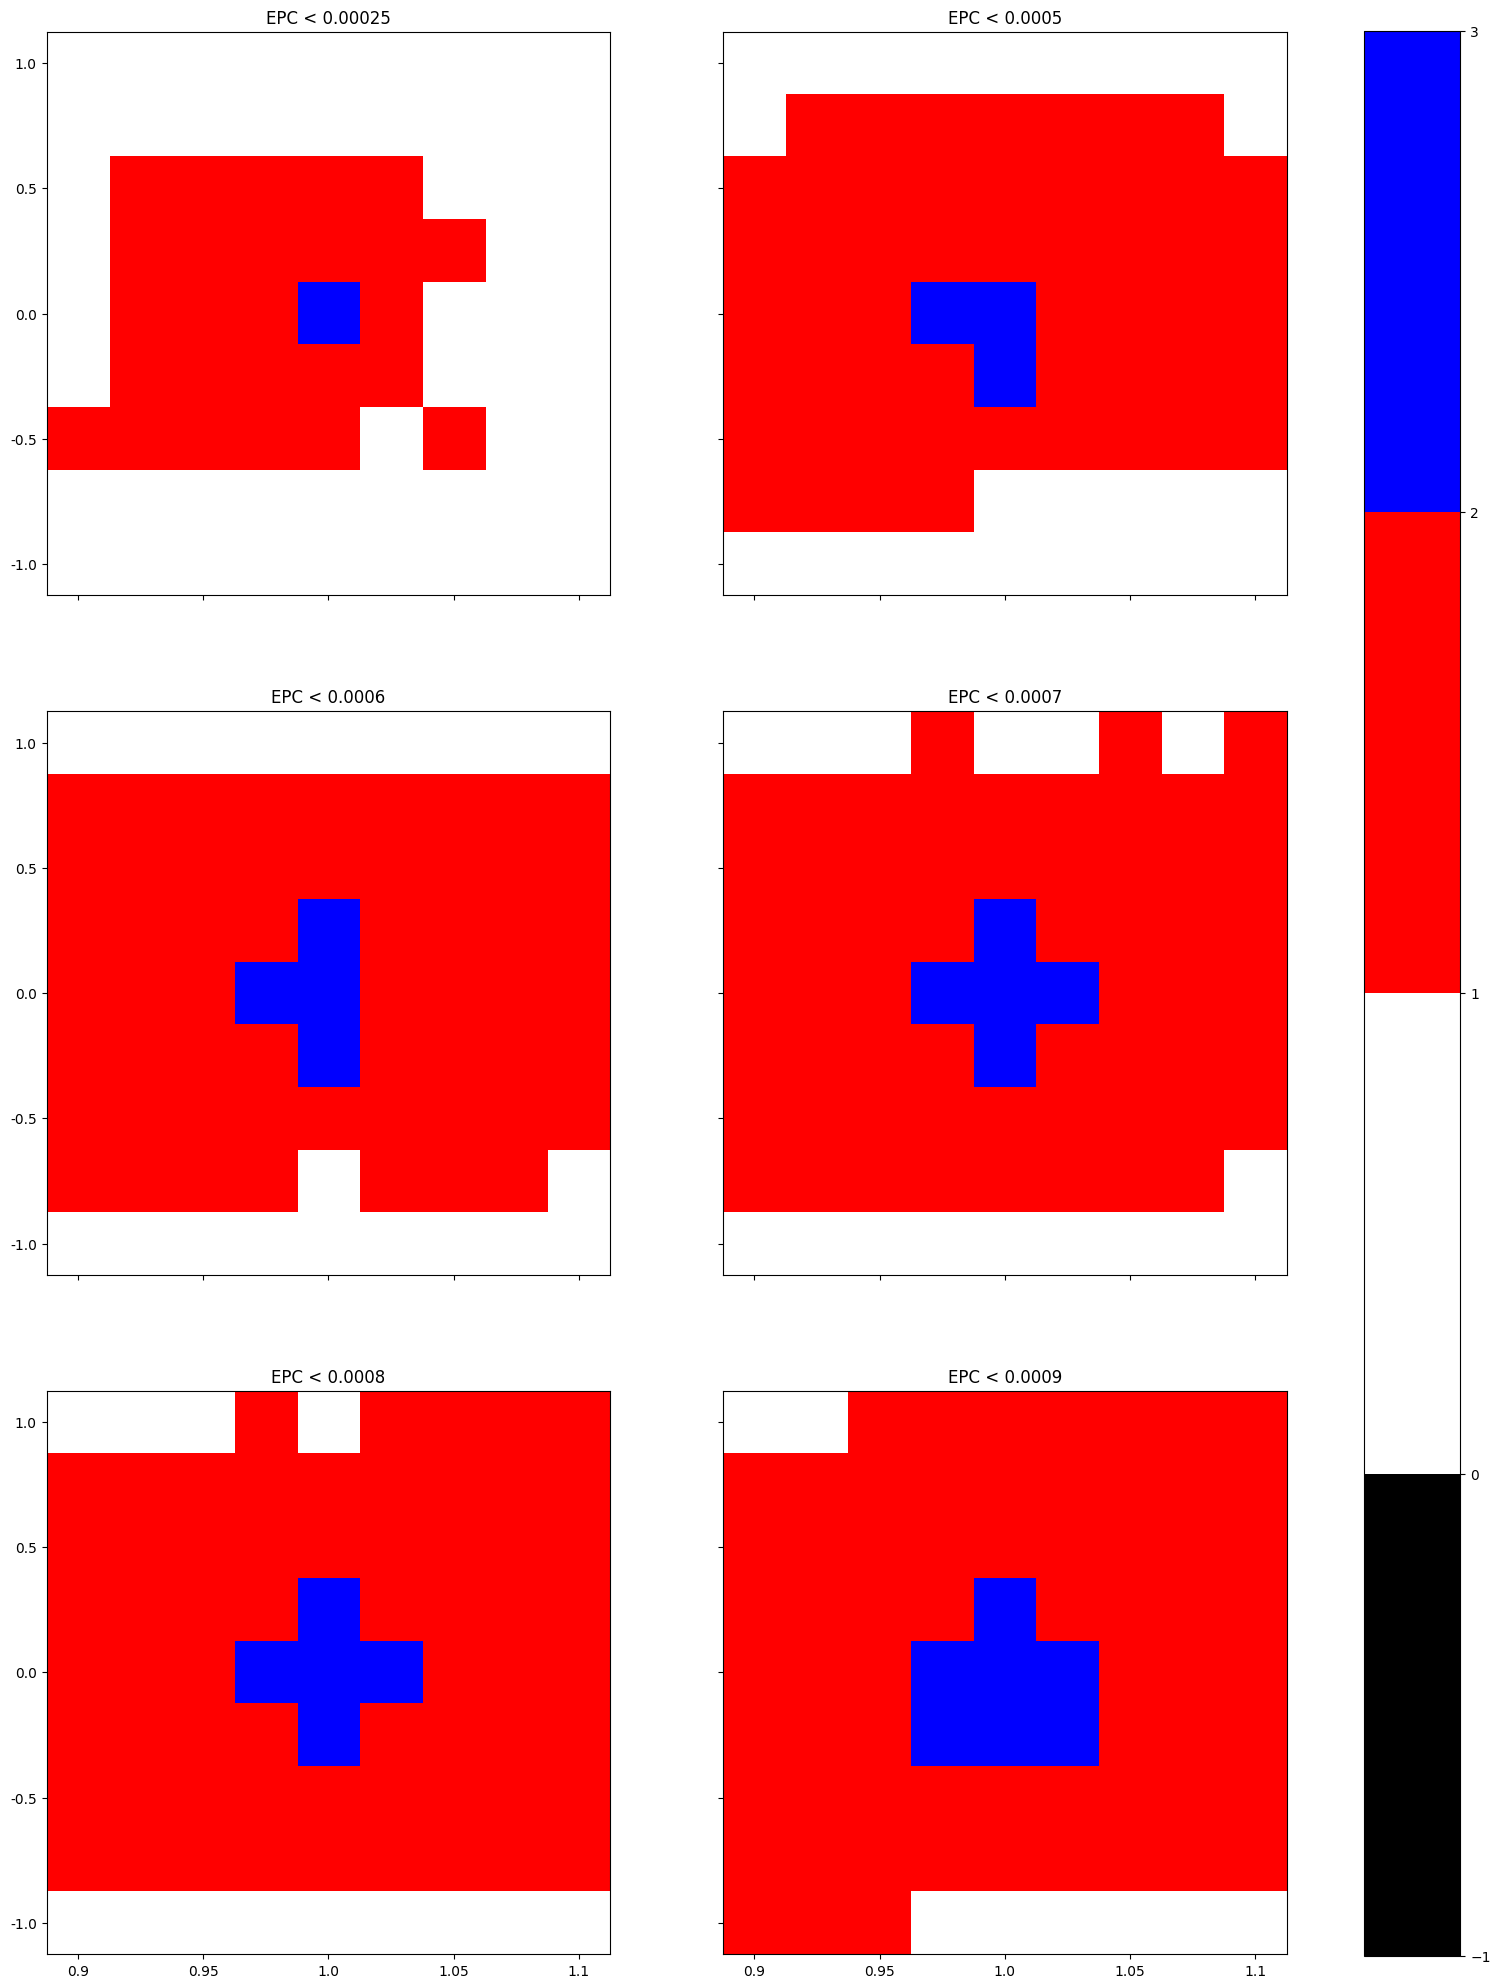

In [31]:
import matplotlib.colors as colors

from matplotlib.colors import BoundaryNorm
from matplotlib.colors import ListedColormap
values = [-1, 0, 1, 2, 3]
colors = ['black', 'white', 'red', 'blue', '#0000FF']
cmap = ListedColormap(colors)
norm = BoundaryNorm(values, len(colors))

cutoffs = np.array(
    [
        [2.5e-4, 5e-4],
        [6e-4, 7e-4],
        [8e-4, 9e-4]
    ]
)



fig, axes = plt.subplots(
    nrows=cutoffs.shape[0],
    ncols=cutoffs.shape[1],
    sharex="col", sharey="row",
    figsize=(20, 25)
)



for idx_row, axes_row in enumerate(axes):
    for idx_col, ax in enumerate(axes_row):
        current_cutoff = cutoffs[idx_row, idx_col]
        epc_combined = np.array(np.flip(oct_epc_grid, axis=0) < current_cutoff, dtype=int) + np.array(np.flip(drag_epc_grid, axis=0) < current_cutoff, dtype=int)
        
        im = ax.imshow(
            epc_combined,
            norm=norm,
            cmap=cmap
        )

        ax.set_yticks(np.arange(0, 9, 2))
        ax.set_yticklabels(np.flip(freq_offset_vals[np.arange(0, 9, 2)] / 1e6))
        ax.set_xticks(np.arange(0, 9, 2))
        ax.set_xticklabels(np.round(scale_vals[np.arange(0, 9, 2)], 3))
        ax.set_title(f"EPC < {current_cutoff}")

#axes[1].set_xticks(np.arange(0, 9, 2))
#axes[1].set_xticklabels(np.round(scale_vals[np.arange(0, 9, 2)], 3))
plt.colorbar(im, ax=axes)
plt.show()

In [18]:
import time

In [19]:
help(time.timeit)

AttributeError: module 'time' has no attribute 'timeit'

In [20]:
test = time.time()

1 + 1

print(time.time() - test)

8.606910705566406e-05


In [21]:
import timeit